In [137]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [139]:
import pandas as pd
print(pd.__version__)

0.18.1


In [140]:
#Reading Titanic Train and Test Datasets! 

titanic_train = pd.read_csv("C:/Users/arjun/Desktop/train.csv")

titanic_test = pd.read_csv("C:/Users/arjun/Desktop/test.csv")

full = pd.concat([titanic_train,titanic_test],ignore_index=True)
titanic = full[ :891 ]

In [6]:
titanic_train.shape 

(891, 12)

In [7]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [142]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [144]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### Prediction and Modelling

In [143]:

train = pd.read_csv("C:/Users/arjun/Desktop/train.csv", dtype={"Age": np.float64}, )
test  = pd.read_csv("C:/Users/arjun/Desktop/test.csv", dtype={"Age": np.float64}, )

In [107]:
def harmonize_data(titanic):
    
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["Age"].median()
    
    titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
    titanic.loc[titanic["Sex"] == "female", "Sex"] = 1
    
    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    titanic.loc[titanic["Embarked"] == "S", "Embarked"] = 0
    titanic.loc[titanic["Embarked"] == "C", "Embarked"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Embarked"] = 2

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic

In [108]:
def create_submission(alg, train, test, predictors, filename):

    alg.fit(train[predictors], train["Survived"])
    predictions = alg.predict(test[predictors])

    submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })
    
    submission.to_csv(filename, index=False)

In [109]:
train_data = harmonize_data(train)
test_data  = harmonize_data(test)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg    = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(
    alg,
    train_data[predictors],
    train_data["Survived"],
    cv=3
)

print(scores.mean())

0.787878787879


In [110]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

alg = RandomForestClassifier(
    random_state=1,
    n_estimators=150,
    min_samples_split=4,
    min_samples_leaf=2
)

scores = cross_validation.cross_val_score(
    alg,
    train_data[predictors],
    train_data["Survived"],
    cv=3
)

print(scores.mean())

0.820426487093


In [124]:
create_submission(alg, train_data, test_data, predictors, "run-01.csv")

In [133]:
titanic_pred = pd.read_csv("C:/Users/arjun/Desktop/run-01.csv")

In [136]:
titanic_pre.sample(6)

,PassengerId,Survived
295,1187,0
316,1208,0
178,1070,1
161,1053,0
413,1305,0
129,1021,0
1,893,0
39,931,0
297,1189,0


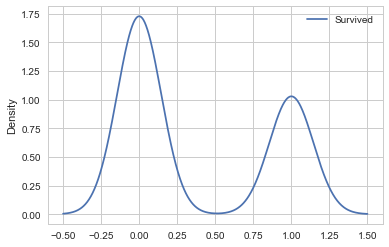

In [135]:
titanic_pred.plot(kind='kde',x= 'PassengerId' , y = 'Survived')